<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,47.173642,90.017683,14.253104,161.444428,155.033108,6.411320
1,0.0,1.0,64.979189,85.432359,13.103331,173.514879,166.720847,6.794031
2,0.0,2.0,20.056318,66.271360,8.243416,104.571093,101.922066,2.649028
3,0.0,3.0,75.343437,28.171439,2.938167,116.453043,110.793321,5.659723
4,0.0,4.0,73.515743,52.844149,-1.912051,134.447841,137.403800,-2.955959
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.913766,48.115330,-11.394753,133.634343,146.079130,-12.444787
19996,999.0,16.0,66.843647,86.067315,18.518404,181.429367,164.778062,16.651305
19997,999.0,17.0,46.977921,29.021669,1.816261,87.815851,90.743964,-2.928113
19998,999.0,18.0,87.269805,92.776904,-14.706578,175.340132,190.091070,-14.750939


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.173642  90.017683  14.253104  161.444428  155.033108   
      1.0    64.979189  85.432359  13.103331  173.514879  166.720847   
      2.0    20.056318  66.271360   8.243416  104.571093  101.922066   
      3.0    75.343437  28.171439   2.938167  116.453043  110.793321   
      4.0    73.515743  52.844149  -1.912051  134.447841  137.403800   
...                ...        ...        ...         ...         ...   
999.0 15.0   86.913766  48.115330 -11.394753  133.634343  146.079130   
      16.0   66.843647  86.067315  18.518404  181.429367  164.778062   
      17.0   46.977921  29.021669   1.816261   87.815851   90.743964   
      18.0   87.269805  92.776904 -14.706578  175.340132  190.091070   
      19.0   83.087702  47.204021  16.156204  156.447927  141.675624   

                 e_hat  
rep   index             
0.0   0.0     6.411320  
      1.0     6.794031  
      2.0     2.649028  
      3.0     5.659723  
      4.0    -2.955959  
...                ...  
999.0 15.0  -12.444787  
      16.0   16.651305  
      17.0   -2.928113  
      18.0  -14.750939  
      19.0   14.772303  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.173642  90.017683  14.253104  161.444428  155.033108   
      1.0    64.979189  85.432359  13.103331  173.514879  166.720847   
      2.0    20.056318  66.271360   8.243416  104.571093  101.922066   
      3.0    75.343437  28.171439   2.938167  116.453043  110.793321   
      4.0    73.515743  52.844149  -1.912051  134.447841  137.403800   
...                ...        ...        ...         ...         ...   
999.0 15.0   86.913766  48.115330 -11.394753  133.634343  146.079130   
      16.0   66.843647  86.067315  18.518404  181.429367  164.778062   
      17.0   46.977921  29.021669   1.816261   87.815851   90.743964   
      18.0   87.269805  92.776904 -14.706578  175.340132  190.091070   
      19.0   83.087702  47.204021  16.156204  156.447927  141.675624   

                 e_hat  
rep   index             
0.0   0.0     6.411320  
      1.0     6.794031  
      2.0     2.649028  
      3.0     5.659723  
      4.0    -2.955959  
...                ...  
999.0 15.0  -12.444787  
      16.0   16.651305  
      17.0   -2.928113  
      18.0  -14.750939  
      19.0   14.772303  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,47.173642,90.017683,14.253104,161.444428,155.033108,6.411320
1,0.0,1.0,64.979189,85.432359,13.103331,173.514879,166.720847,6.794031
2,0.0,2.0,20.056318,66.271360,8.243416,104.571093,101.922066,2.649028
3,0.0,3.0,75.343437,28.171439,2.938167,116.453043,110.793321,5.659723
4,0.0,4.0,73.515743,52.844149,-1.912051,134.447841,137.403800,-2.955959
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.913766,48.115330,-11.394753,133.634343,146.079130,-12.444787
19996,999.0,16.0,66.843647,86.067315,18.518404,181.429367,164.778062,16.651305
19997,999.0,17.0,46.977921,29.021669,1.816261,87.815851,90.743964,-2.928113
19998,999.0,18.0,87.269805,92.776904,-14.706578,175.340132,190.091070,-14.750939


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.173642  90.017683  14.253104  161.444428  155.033108   
      1.0    64.979189  85.432359  13.103331  173.514879  166.720847   
      2.0    20.056318  66.271360   8.243416  104.571093  101.922066   
      3.0    75.343437  28.171439   2.938167  116.453043  110.793321   
      4.0    73.515743  52.844149  -1.912051  134.447841  137.403800   
...                ...        ...        ...         ...         ...   
999.0 15.0   86.913766  48.115330 -11.394753  133.634343  146.079130   
      16.0   66.843647  86.067315  18.518404  181.429367  164.778062   
      17.0   46.977921  29.021669   1.816261   87.815851   90.743964   
      18.0   87.269805  92.776904 -14.706578  175.340132  190.091070   
      19.0   83.087702  47.204021  16.156204  156.447927  141.675624   

                 e_hat  
rep   index             
0.0   0.0     6.411320  
      1.0     6.794031  
      2.0     2.649028  
      3.0     5.659723  
      4.0    -2.955959  
...                ...  
999.0 15.0  -12.444787  
      16.0   16.651305  
      17.0   -2.928113  
      18.0  -14.750939  
      19.0   14.772303  

[20000 rows x 6 columns]

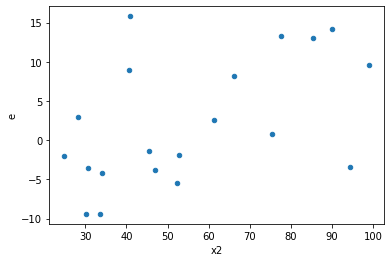

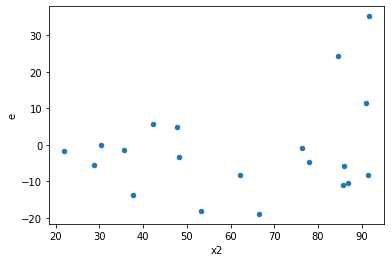

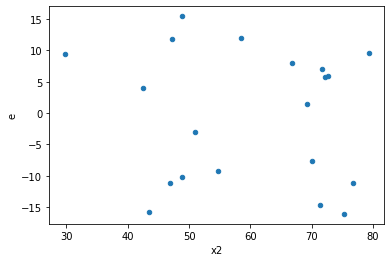

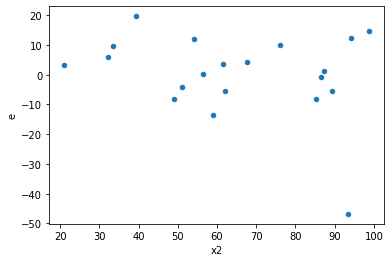

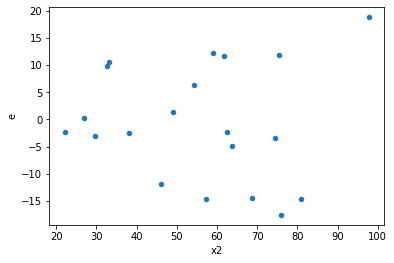

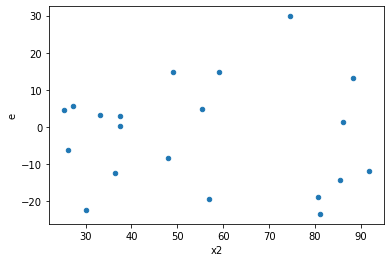

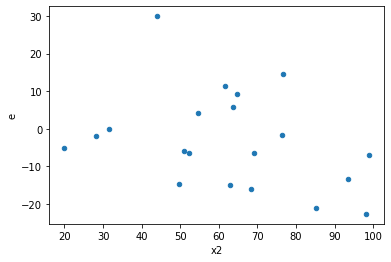

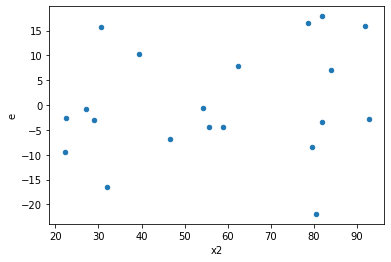

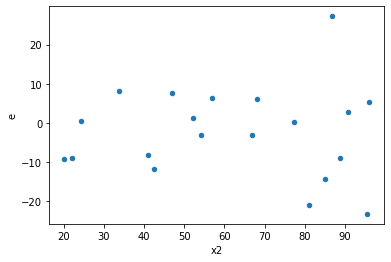

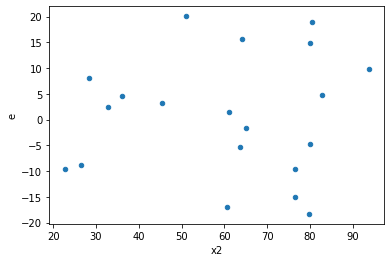

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,7.0,9.0,504.2049815841266,2551.863259392311,72.02928308344666,283.54036215470126,3.9364595900005956,0.06045054680846662,0.9697747265957667,0.03022527340423331,Reject001=1 : Homoscedasticity
6.0,4.0,12.0,250.22309064040886,1755.8787284884243,62.555772660102214,146.32322737403535,2.339084326702908,0.2284021423785374,0.8857989288107313,0.1142010711892687,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,566.1797873296548,1096.6917413754666,70.77247341620685,137.08646767193332,1.9370026375330922,0.3689136833458877,0.8155431583270562,0.18445684167294385,Reject001=1 : Homoscedasticity
9.0,10.0,6.0,1218.8318072849206,915.4050656044266,121.88318072849206,152.5675109340711,1.2517519646449964,0.8157901657587165,0.5921049171206417,0.4078950828793583,Reject001=1 : Homoscedasticity
10.0,10.0,6.0,348.2600532696051,824.2543926342372,34.82600532696051,137.3757321057062,3.9446307670365206,0.10667152881178676,0.9466642355941066,0.05333576440589338,Reject001=1 : Homoscedasticity
15.0,5.0,11.0,242.4388327413124,2101.321725357638,48.487766548262485,191.02924775978528,3.9397411214980087,0.05426359241422518,0.9728682037928874,0.02713179620711259,Reject001=1 : Homoscedasticity
18.0,8.0,8.0,478.8243489956214,559.2674609875021,59.853043624452674,69.90843262343776,1.1680012976796557,0.8315019650463367,0.5842490174768317,0.41575098252316833,Reject001=1 : Homoscedasticity
22.0,4.0,12.0,35.58987001750301,1312.1477198867367,8.897467504375753,109.34564332389472,12.289524324772055,0.0006645380228065267,0.9996677309885967,0.00033226901140326337,Reject001=0 : Heteroscedasticity
23.0,7.0,9.0,1088.6510413555573,1379.6400397216162,155.5215773365082,153.29333774684625,0.9856724730560017,0.9915853215827641,0.5042073392086179,0.49579266079138207,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,9.0,577.7801331272132,234.4252971071738,82.54001901817331,26.04725523413042,0.31557122888953354,0.1424787365893737,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,1737.4491394952386,473.71548045496434,217.18114243690482,59.21443505687054,0.2726499842134012,0.08434987259987614,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,1091.8233124421356,930.8525646496033,155.97475892030508,103.42806273884482,0.6631076941858979,0.6016676664639404,Reject001=1 : Homoscedasticity
3.0,7.0,9.0,504.2049815841266,2551.863259392311,72.02928308344666,283.54036215470126,3.9364595900005956,0.06045054680846662,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,1393.9927262944368,708.4446934612718,174.2490907868046,88.55558668265897,0.5082126184004458,0.3578387335427273,Reject001=1 : Homoscedasticity
5.0,9.0,7.0,1544.4622488330763,552.9843774501959,171.6069165370085,78.99776820717084,0.46034139999324736,0.2760734860306603,Reject001=1 : Homoscedasticity
6.0,4.0,12.0,250.22309064040886,1755.8787284884243,62.555772660102214,146.32322737403535,2.339084326702908,0.2284021423785374,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,566.1797873296548,1096.6917413754666,70.77247341620685,137.08646767193332,1.9370026375330922,0.3689136833458877,Reject001=1 : Homoscedasticity
8.0,9.0,7.0,1861.7137329126604,326.81926985505646,206.85708143474005,46.688467122150925,0.22570398266438055,0.04244010868829737,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      925
Reject001=0 : Heteroscedasticity     75
Name: Result_test, dtype: int64